In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os

from utils_plot import get_predefined_color_labels, plotDicts, abbreviateValue

from run_pruned_v2 import run_pruning_experiment


In [3]:
type_criterions = [ 'divergence_criterion', 'entropy']
output_dir = 'output_results_12_28'



min_support_tree = 0.1
min_sup_divergences = [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]

saveFig = False

size_fig = (3,3)

In [23]:
results_all = {}

In [24]:
        
abbreviations = {"one_at_time":"indiv t.", \
                        "divergence_criterion":"g$\\Delta$", "entropy":"entr"}



color_labels = get_predefined_color_labels(abbreviations)
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

In [25]:
output_fig_dir = os.path.join(os.path.curdir, output_dir, "figures", 'comparisons')

In [26]:
saveFig = True

if saveFig:
    from pathlib import Path

    Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

In [27]:
type_gens = ['generalized']
datasets = ['adult', 'artificial_gaussian', 'compas', 'german', 'wine']
metrics = ['d_error', 'd_error', 'd_fpr', 'd_error', 'd_error']

In [28]:
take_top_k = 10000



In [29]:
color_labels = {}

colors = ["#EE552F", '#9100B5', '#5C72CD', '#5CCDAE', '#581845']
 
for dataset_name, color in zip(datasets, colors[:len(datasets)]):
    dataset_name = 'artificial' if dataset_name  =='artificial_gaussian' else dataset_name
    for config_str in ['base', 'generalized']:
        color_labels[abbreviateValue(f'{config_str}_{dataset_name}', abbreviations)]=color
        for take_top_k_str in ['', f'_top_{take_top_k}']:
            for type_criterion in type_criterions:
                color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}{take_top_k_str}', abbreviations)]=color

            
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

lines_style.update({k:"dotted" for k in color_labels if( abbreviateValue("entropy", abbreviations) in k and abbreviations["entropy"] in k)})

adult_d_error_divergence_criterion_0.1_i
adult_d_error_divergence_criterion_0.1_top_10000_i
artificial_gaussian_d_error_divergence_criterion_0.1_i
artificial_gaussian_d_error_divergence_criterion_0.1_top_10000_i
compas_d_fpr_divergence_criterion_0.1_i
compas_d_fpr_divergence_criterion_0.1_top_10000_i
german_d_error_divergence_criterion_0.1_i
german_d_error_divergence_criterion_0.1_top_10000_i
wine_d_error_divergence_criterion_0.1_i
wine_d_error_divergence_criterion_0.1_top_10000_i
wine_d_error_divergence_criterion_0.1_top_10000_i not available


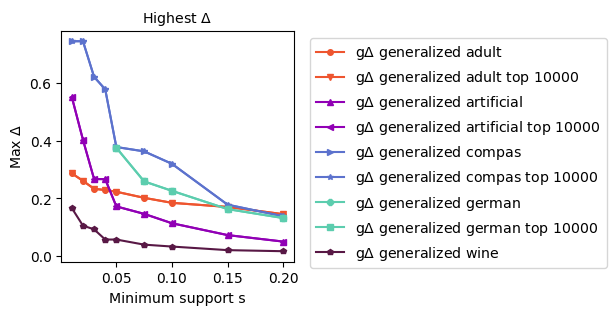

In [35]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}

type_takes = ['', f'_top_{take_top_k}']
for dataset_name_file, metric in zip(datasets, metrics):
    
    dataset_name = 'artificial' if dataset_name_file  =='artificial_gaussian' else dataset_name_file  


    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for type_criterion in ['divergence_criterion']:
        for k in results_all[dataset_name]:
            results_all[dataset_name][k][type_criterion] = {}
        for take_top_k_str in type_takes:
            pruning_type = ''

    
            conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}{take_top_k_str}_i"

            print(conf_name)
            if os.path.isfile(os.path.join(output_results, f'{conf_name}_time.json')):
                with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
                    results_all[dataset_name]['time'][type_criterion][take_top_k_str] = json.load(json_file)

                with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
                    results_all[dataset_name]['fp'][type_criterion][take_top_k_str] = json.load(json_file)

                with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
                    results_all[dataset_name][f'max_{metric}' ][type_criterion][take_top_k_str] = json.load(json_file)    
            else:
                print(f'{conf_name} not available')


    info_i =f'max_{metric}' 
    results = results_all[dataset_name][info_i]

    for type_criterion in  type_criterions:
        if type_criterion in results:
            for take_top_k_str in type_takes:
                if take_top_k_str in results[type_criterion]:
                    for sup in sorted(results[type_criterion][take_top_k_str].keys()):
                        for type_gen in type_gens :

                            type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}{pruning_type}{take_top_k_str}", abbreviations)
                            if type_gen_str not in info_plot:
                                info_plot[type_gen_str] = {}
                            info_plot[type_gen_str][float(sup)] = results[type_criterion][take_top_k_str][sup][type_gen]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta$"
        title=f"Highest $\\Delta$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    #figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")
    figure_name = ''
    
size_fig = (3, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=saveFig, nameFig = figure_name, legendSize=10.2)
            




In [31]:
results_all['compas']['max_d_fpr']

{'divergence_criterion': {'0.01': {'base': 0.661685994647636,
   'generalized': 0.7450193279809694},
  '0.02': {'base': 0.6508164294302446, 'generalized': 0.7450193279809694},
  '0.03': {'base': 0.5881565828829302, 'generalized': 0.6213634140024747},
  '0.04': {'base': 0.3632988978734425, 'generalized': 0.5783526613143026},
  '0.05': {'base': 0.3632988978734425, 'generalized': 0.37835266131430273},
  '0.075': {'base': 0.3632988978734425, 'generalized': 0.3632988978734425},
  '0.1': {'base': 0.2954069248801942, 'generalized': 0.3201366988729882},
  '0.15': {'base': 0.11515994005706533, 'generalized': 0.17855716029180785},
  '0.2': {'base': 0.08875176193262761, 'generalized': 0.13832150866632764}},
 'divergence_criterion_top_10000': {'0.01': {'base_pruned': 0.661685994647636,
   'generalized_pruned': 0.7450193279809694,
   'base': 0.661685994647636,
   'generalized': 0.7450193279809694},
  '0.02': {'base_pruned': 0.6508164294302446,
   'generalized_pruned': 0.7450193279809694,
   'base':

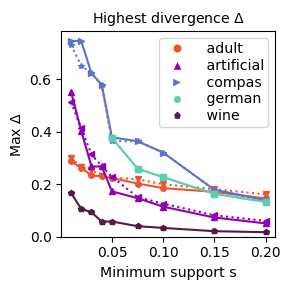

In [90]:
from utils_plot import MARKERS

info_dicts = info_plot

marker=True
limit=(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=10.2
markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False
yscale="linear"
legendSize=10.2
saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=sizeFig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    if marker:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=MARKERS[m_i],
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        m_i = m_i + 1
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)



plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
idxs = [i for i, l in enumerate(labels) if abbreviateValue('divergence_criterion', abbreviations) in l]
#handles = [handles[i] for i in idxs]
legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'div_entropy_comparison.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

In [58]:
handles

In [57]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

for i in idxs:
    print(i)
    

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center')

plt.show()

0
2
4
6


IndexError: list index out of range

In [ ]:
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

In [ ]:
labels

In [62]:
color_labels = {}

colors = ["#EE552F", '#5CCDAE', '#5C72CD', '#9100B5']
 
for dataset_name, color in zip(datasets, colors[:len(datasets)]):
    for config_str in ['base', 'generalized']:
        color_labels[abbreviateValue(f'{config_str}_{dataset_name}', abbreviations)]=color
        for type_criterion in type_criterions:
            color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}', abbreviations)]=color

            
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

lines_style.update({k:"--" for k in color_labels if( abbreviateValue("entropy", abbreviations) in k and abbreviations["entropy"] in k)})

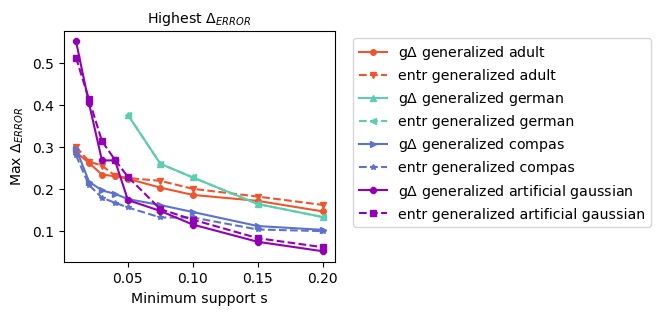

In [55]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}


for dataset_name in datasets:

    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for type_criterion in type_criterions:
        
        pruning_type = ''

        conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"


        with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
            results_all[dataset_name]['time'][type_criterion] = json.load(json_file)

        with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
            results_all[dataset_name]['fp'][type_criterion] = json.load(json_file)

        with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
            results_all[dataset_name][f'max_{metric}' ][type_criterion] = json.load(json_file)    

            

    info_i =f'max_{metric}' 
    results = results_all[dataset_name][info_i]

    for type_criterion in  type_criterions:
        for sup in sorted(results[type_criterion].keys()):
            for type_gen in type_gens:
                type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}", abbreviations)
                if type_gen_str not in info_plot:
                    info_plot[type_gen_str] = {}
                info_plot[type_gen_str][float(sup)] = results[type_criterion][sup][type_gen]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta_{{{m}}}$"
        title=f"Highest $\\Delta_{{{m}}}$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    #figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")
    figure_name = ''
    
size_fig = (3.5, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=saveFig, nameFig = figure_name, legendSize=10.2)
            




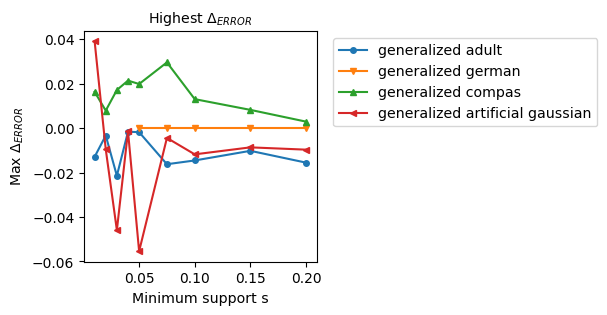

In [52]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}


for dataset_name in ['adult', 'german', 'compas', 'artificial_gaussian']:

    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for type_criterion in type_criterions:

        pruning_type = ''

        conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"



        with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
            results_all[dataset_name]['time'][type_criterion] = json.load(json_file)

        with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
            results_all[dataset_name]['fp'][type_criterion] = json.load(json_file)

        with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
            results_all[dataset_name][f'max_{metric}' ][type_criterion] = json.load(json_file)    

            

    info_i =f'max_{metric}' 
    results = results_all[dataset_name][info_i]

    for type_criterion in ['entropy', 'divergence_criterion']:

        for sup in sorted(results[type_criterion].keys()):
            for type_gen in type_gens:
                type_gen_str = abbreviateValue(f"{type_gen}_{dataset_name}", abbreviations)
                if type_gen_str not in info_plot:
                    info_plot[type_gen_str] = {}
                if float(sup) not in info_plot[type_gen_str]:
                    info_plot[type_gen_str][float(sup)] = 0
                if type_criterion == 'entropy':
                    info_plot[type_gen_str][float(sup)] -= results[type_criterion][sup][type_gen]
                else:
                    info_plot[type_gen_str][float(sup)] += results[type_criterion][sup][type_gen]
                    


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta_{{{m}}}$"
        title=f"Highest $\\Delta_{{{m}}}$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    #figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")
    figure_name = ''
    
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                  #  linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=saveFig, nameFig = figure_name, legendSize=10.2)
            




In [8]:
!python run_pruned_v2.py --dataset_name compas

compas
[0.15, 0.2]
output_red
False
True
base
_pruned
0.15 Traceback (most recent call last):
  File "/home/dauin_user/pastor/hierarchical-subgroup/hierarchical-subgroup-exploration/run_pruned_v2.py", line 394, in <module>
    run_pruning_experiemnt(min_support_tree = args.min_support_tree,
  File "/home/dauin_user/pastor/hierarchical-subgroup/hierarchical-subgroup-exploration/run_pruned_v2.py", line 193, in run_pruning_experiemnt
    FP_fm = extract_divergence_generalized(
  File "/home/dauin_user/pastor/hierarchical-subgroup/hierarchical-subgroup-exploration/utils_extract_divergence_generalized.py", line 111, in extract_divergence_generalized
    from divexplorer_generalized.FP_DivergenceExplorer import FP_DivergenceExplorer
  File "/home/dauin_user/pastor/hierarchical-subgroup/hierarchical-subgroup-exploration/divexplorer_generalized/FP_DivergenceExplorer.py", line 3, in <module>
    from mlxtend.frequent_patterns.apriori import (
ModuleNotFoundError: No module named 'mlxtend'


In [11]:
!python run_experiments_pruning.py --dataset_name compas --min_sup_divergences 0.01 0.02 0.03 0.04 0.05 0.075 0.1 0.15 0.2

compas
[0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]
output_red
base
_pruned
0.02 (0.48)
0.03 (0.15)
0.04 (0.15)
0.05 (0.17)
0.075 (0.15)
0.1 (0.15)
0.15 (0.14)
0.2 (0.13)

0.02 (0.23)
0.03 (0.20)
0.04 (0.19)
0.05 (0.20)
0.075 (0.25)
0.1 (0.18)
0.15 (0.16)
0.2 (0.14)
generalized
_pruned
0.02 (0.26)
0.03 (0.23)
0.04 (0.22)
0.05 (0.21)
0.075 (0.20)
0.1 (0.19)
0.15 (0.18)
0.2 (0.17)

0.02 (0.76)
0.03 (0.60)
0.04 (0.52)
0.05 (0.42)
0.075 (0.39)
0.1 (0.30)
0.15 (0.24)
0.2 (0.23)
Figure(300x300)
Figure(300x300)
Figure(300x300)


In [49]:
!python run_pruned_v2.py --dataset_name folkstables --metric d_outcome --min_sup_divergences 0.01 0.02 0.03 0.04 0.05 0.075 0.1 0.15 0.2

folkstables
[0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]
output_red
base
_pruned
0.01 (12.22)
0.02 (9.75)
0.03 (8.80)
0.04 (8.52)
0.05 (8.13)
0.075 (7.87)
0.1 (7.56)
0.15 (6.81)
0.2 (6.63)

0.01 (12.39)
0.02 (9.96)
0.03 (8.95)
0.04 (8.53)
0.05 (8.08)
0.075 (7.85)
0.1 (7.20)
0.15 (6.45)
0.2 (5.88)
generalized
_pruned
0.01 1 10000
2 20000
(31.69)
0.02 (23.29)
0.03 (20.33)
0.04 (18.76)
0.05 (17.77)
0.075 (15.97)
0.1 (14.91)
0.15 (13.14)
0.2 (12.52)

0.01 1 10000
2 20000
(34.83)
0.02 (24.24)
0.03 (20.70)
0.04 (19.34)
0.05 (17.60)
0.075 (15.87)
0.1 (14.55)
0.15 (12.24)
0.2 (11.78)
Figure(300x300)
Figure(300x300)


In [16]:
!python run_pruned_v2.py --dataset_name german --metric d_error --min_sup_divergences 0.01 0.02 0.03 0.04 0.05 0.075 0.1 0.15 0.2

german
[0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]
output_red
base
_pruned
0.01 Skipped 10 lower than 50
0.02 Skipped 20 lower than 50
0.03 Skipped 30 lower than 50
0.04 Skipped 40 lower than 50
0.05 1 10000
2 20000
(1.91)
0.075 1 10000
(0.84)
0.1 (0.57)
0.15 (0.35)
0.2 (0.20)

0.01 Skipped 10 lower than 50
0.02 Skipped 20 lower than 50
0.03 Skipped 30 lower than 50
0.04 Skipped 40 lower than 50
0.05 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
(4.68)
0.075 1 10000
2 20000
(2.13)
0.1 1 10000
(1.26)
0.15 (0.57)
0.2 (0.30)
generalized
_pruned
0.01 Skipped 10 lower than 50
0.02 Skipped 20 lower than 50
0.03 Skipped 30 lower than 50
0.04 Skipped 40 lower than 50
0.05 1 10000
2 20000
3 30000
4 40000
5 50000
(5.95)
0.075 1 10000
2 20000
(2.46)
0.1 (1.36)
0.15 (0.64)
0.2 (0.40)

0.01 Skipped 10 lower than 50
0.02 Skipped 20 lower than 50
0.03 Skipped 30 lower than 50
0.04 Skipped 40 lower than 50
0.05 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000

In [22]:
!python run_pruned_v2.py --dataset_name online_shoppers_intention --metric d_error --min_sup_divergences 0.03 0.04 0.05 0.075 0.1 0.15 0.2

online_shoppers_intention
[0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]
output_red
base
_pruned
0.03 (1.75)
0.04 (1.33)
0.05 (1.15)
0.075 (1.00)
0.1 (0.96)
0.15 (0.56)
0.2 (0.45)

0.03 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
(7.72)
0.04 1 10000
2 20000
3 30000
(5.35)
0.05 1 10000
2 20000
(3.94)
0.075 (2.86)
0.1 (2.44)
0.15 (1.30)
0.2 (0.71)
generalized
_pruned
0.03 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
16 160000
17 170000
18 180000
19 190000
20 200000
21 210000
22 220000
23 230000
24 240000
25 250000
26 260000
27 270000
28 280000
29 290000
30 300000
31 310000
32 320000
33 330000
34 340000
35 350000
36 360000
37 370000
38 380000
39 390000
40 400000
41 410000
42 420000
43 430000
44 440000
45 450000
46 460000
47 470000
48 480000
49 490000
50 500000
51 510000
52 520000
53 530000
54 540000
55 550000
56 560000
57 570000
58 580000
59 590000
60 600000
61 610000
62 620000
63 630000
64 640000
65 650

401 4010000
402 4020000
403 4030000
404 4040000
405 4050000
406 4060000
407 4070000
408 4080000
409 4090000
410 4100000
411 4110000
412 4120000
413 4130000
414 4140000
415 4150000
416 4160000
417 4170000
418 4180000
419 4190000
420 4200000
421 4210000
422 4220000
423 4230000
424 4240000
425 4250000
426 4260000
427 4270000
428 4280000
429 4290000
430 4300000
431 4310000
432 4320000
433 4330000
434 4340000
435 4350000
436 4360000
437 4370000
438 4380000
439 4390000
440 4400000
441 4410000
442 4420000
443 4430000
444 4440000
445 4450000
446 4460000
447 4470000
448 4480000
449 4490000
450 4500000
451 4510000
452 4520000
453 4530000
454 4540000
455 4550000
456 4560000
457 4570000
458 4580000
459 4590000
460 4600000
461 4610000
462 4620000
463 4630000
464 4640000
465 4650000
466 4660000
467 4670000
468 4680000
469 4690000
470 4700000
471 4710000
472 4720000
473 4730000
474 4740000
475 4750000
476 4760000
477 4770000
478 4780000
479 4790000
480 4800000
481 4810000
482 4820000
483 4830000
484 

49 490000
50 500000
51 510000
52 520000
53 530000
54 540000
55 550000
56 560000
57 570000
58 580000
59 590000
60 600000
61 610000
62 620000
63 630000
64 640000
65 650000
66 660000
67 670000
68 680000
69 690000
70 700000
71 710000
72 720000
73 730000
74 740000
75 750000
76 760000
77 770000
78 780000
79 790000
80 800000
81 810000
82 820000
83 830000
84 840000
85 850000
86 860000
87 870000
88 880000
89 890000
90 900000
91 910000
92 920000
93 930000
94 940000
95 950000
96 960000
97 970000
98 980000
99 990000
100 1000000
101 1010000
102 1020000
103 1030000
104 1040000
105 1050000
106 1060000
107 1070000
108 1080000
109 1090000
110 1100000
111 1110000
112 1120000
113 1130000
114 1140000
115 1150000
116 1160000
117 1170000
118 1180000
119 1190000
120 1200000
121 1210000
122 1220000
123 1230000
124 1240000
125 1250000
126 1260000
127 1270000
128 1280000
129 1290000
130 1300000
131 1310000
132 1320000
133 1330000
134 1340000
135 1350000
136 1360000
137 1370000
138 1380000
139 1390000
140 140000

In [24]:
from utils_plot import plotDicts

dataset_name = 'german'
metric = 'd_error'
type_criterion="divergence_criterion"

type_experiment = "one_at_time"
min_support_tree = 0.1

In [25]:
import json
import os



output_results = os.path.join(os.path.curdir, "output_red", 'performance')

conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}"



with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
    result_time = json.load(json_file)

with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
    result_fp = json.load(json_file)

with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
    result_maxdiv = json.load(json_file)

In [26]:
from run_experiments_pruning import abbreviateValue, get_predefined_color_labels

abbreviations = {"one_at_time":"indiv t.", \
                        "divergence_criterion":"g$\\Delta$", "entropy":"entr"}

color_labels = get_predefined_color_labels(abbreviations)

lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})



In [27]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output_figures_read", "figures", "output_performance")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

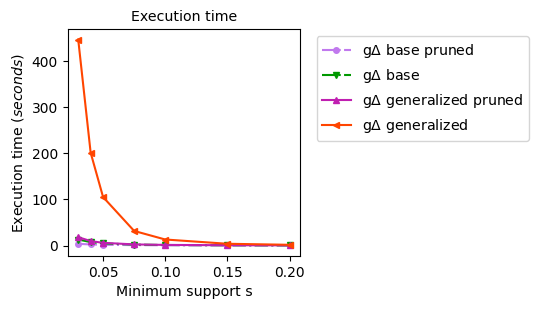

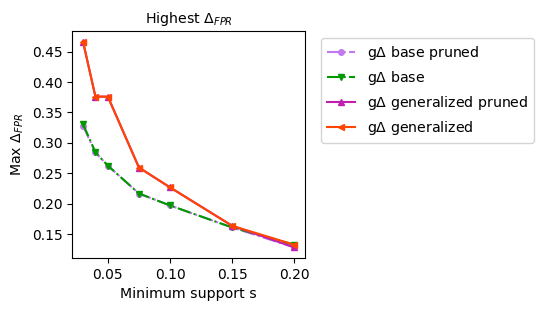

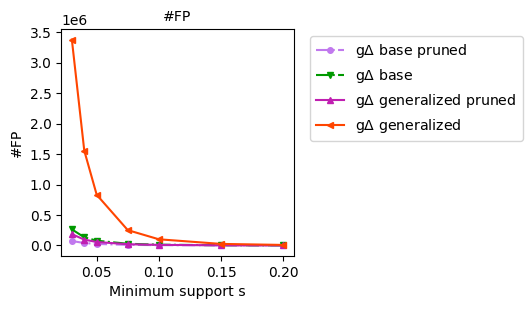

In [28]:
size_fig = (3,3)


for info_i, results in [('time', result_time), (f"max_{metric}", result_maxdiv), ('FP', result_fp)]:

    info_plot = {}
    for sup in sorted(results.keys()):
        for type_gen in results[sup]:
            type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
            if type_gen_str not in info_plot:
                info_plot[type_gen_str] = {}
            info_plot[type_gen_str][float(sup)] = results[sup][type_gen]

    figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")
       
    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        ylabel="Max $\\Delta_{FPR}$"
        title="Highest $\\Delta_{FPR}$" 

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 
        
    

    plotDicts(info_plot, marker=True, \
          title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
          xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
         outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)

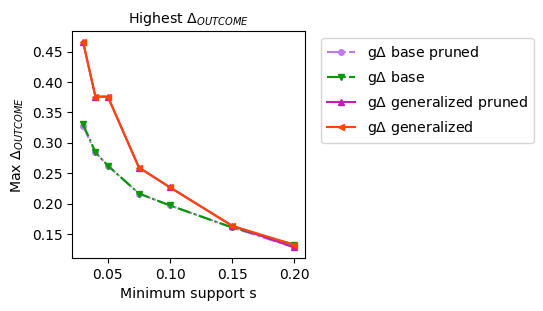

In [41]:
info_i, results  = f"max_{metric}", result_maxdiv

info_plot = {}
for sup in sorted(results.keys()):
    for type_gen in results[sup]:
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][float(sup)] = results[sup][type_gen]

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")

for type_gen_str in info_plot:
    info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


a = "d_outcome"
m = a[2:].upper()
                
ylabel=f"Max $\\Delta_{{{m}}}$"
title=f"Highest $\\Delta_{{{m}}}$"

plotDicts(info_plot, marker=True, \
          title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
          xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
         outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)